In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model  import LinearRegression
 

import pickle

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = pd.DataFrame(boston.data)

column = boston.feature_names
boston_data.columns=column

boston_data['MEDV'] = boston.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
boston_data.isna().sum()          # no null values found

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

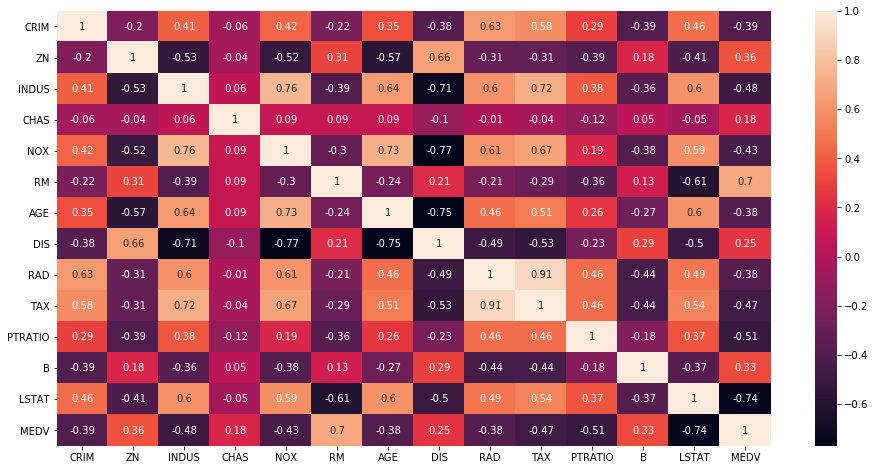

In [4]:
corr_mat = boston_data.corr().round(2)
plt.figure(figsize=(16,8))
sns.heatmap(corr_mat,annot=True)

In [5]:
#  INDUS,NOX,AGE,DIS,RAD are highly correlated to each other so drop these column

bdata = boston_data.drop(['INDUS','NOX','AGE','DIS','RAD'],axis = 1)
bdata


,CRIM,ZN,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0.0,6.575,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,0.0,6.421,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,0.0,7.185,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,0.0,6.998,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,0.0,7.147,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,6.593,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,0.0,6.120,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,0.0,6.976,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,0.0,6.794,273.0,21.0,393.45,6.48,22.0


c:\users\pawan kumar\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

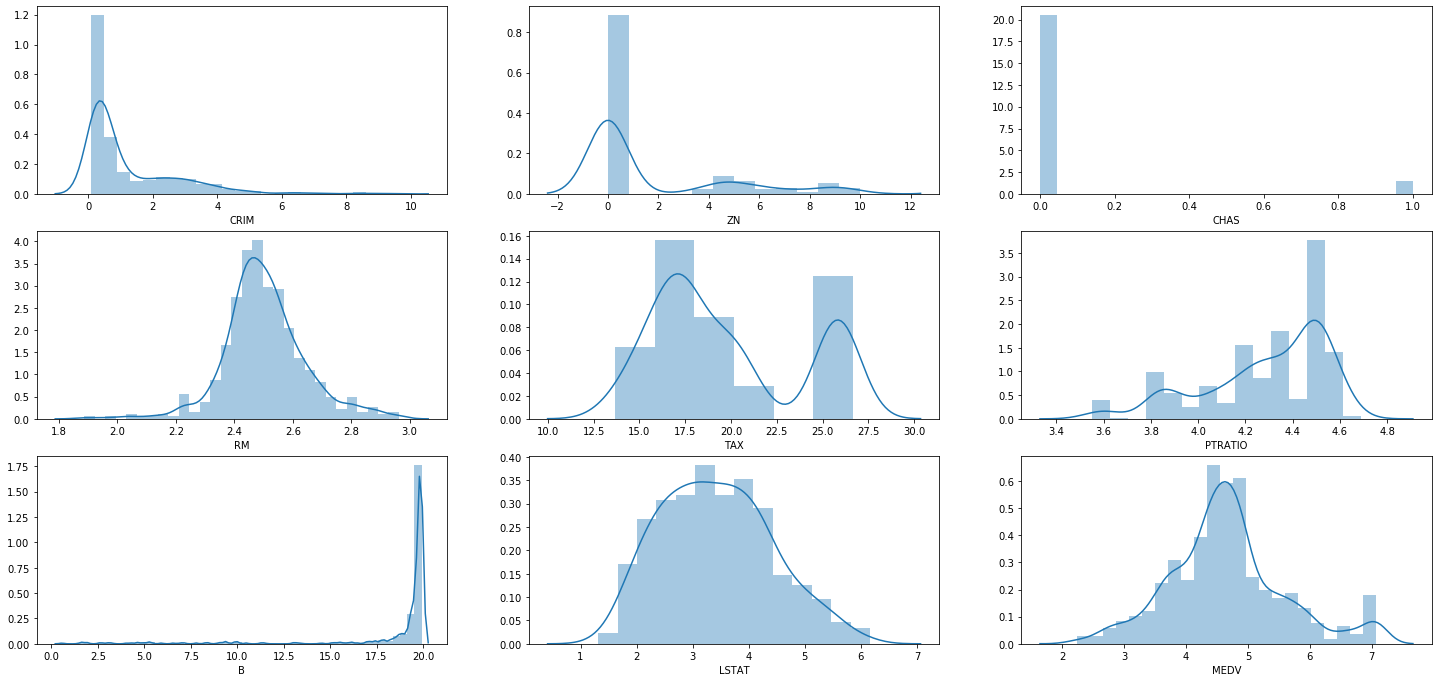

In [26]:
fig = plt.figure(figsize=(25,20))
plot = 1
for column in bdata:
    if plot<15:
        ax=plt.subplot(5,3,plot)
        sns.distplot(bdata[column])
    plot+=1
plt.tight_layout      

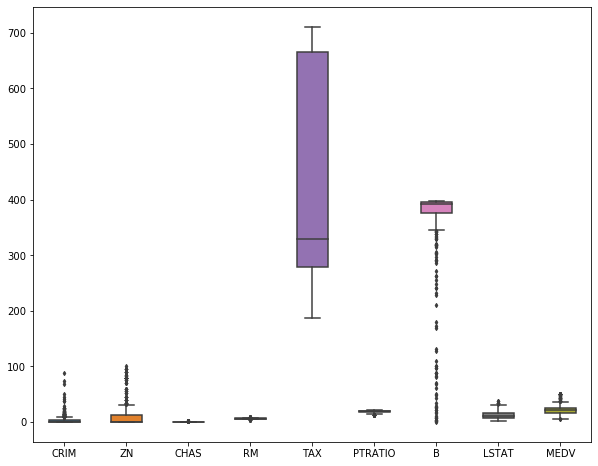

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=bdata, width= 0.5,ax=ax,  fliersize=3)

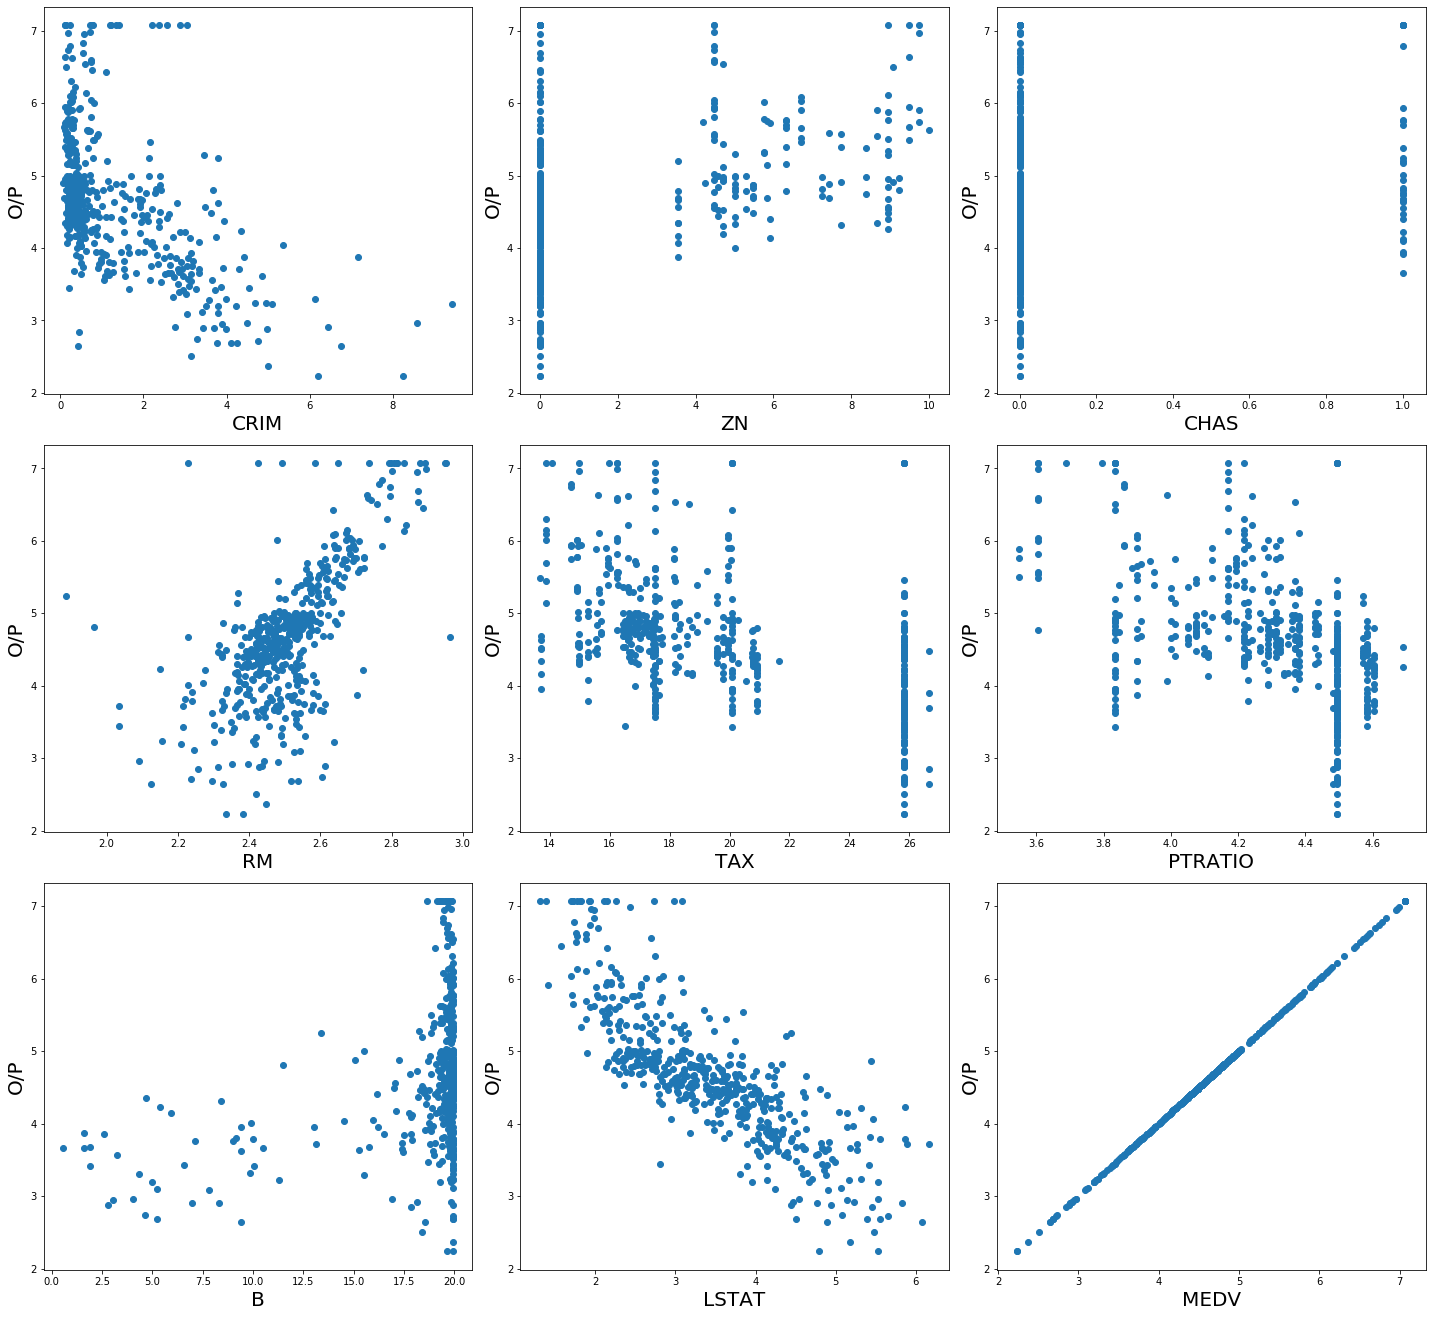

In [10]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1
y = bdata['MEDV']

for column in bdata:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(bdata[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('O/P',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
bdata.columns

Index(['CRIM', 'ZN', 'CHAS', 'RM', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

In [59]:
# there is good relationship b/w RM,PTRATIO,B so use these columns only to train the model

X = bdata.drop(columns = ['ZN', 'CHAS','TAX', 'B', 'MEDV'])
Y = bdata['MEDV']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [60]:
x_scaled

array([[-0.79315664,  0.43772198, -1.45357289, -1.20268938],
       [-0.73400554,  0.2215129 , -0.2669211 , -0.39995271],
       [-0.73404728,  1.2702097 , -0.2669211 , -1.42993268],
       ...,
       [-0.67797266,  0.98910921,  1.13618741, -1.05740615],
       [-0.61965653,  0.74087345,  1.13618741, -0.88429978],
       [-0.69780746, -0.33937832,  1.13618741, -0.6190882 ]])

In [61]:
vif = pd.DataFrame()
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,CRIM,1.578446
1,RM,1.778045
2,PTRATIO,1.262125
3,LSTAT,2.379023


In [62]:
# vif seems good we can proceed now

In [63]:
# split the data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x_scaled,Y,test_size=0.30,random_state=355)


In [64]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = lin_reg.predict(x_test)

In [66]:
y_pred

array([3.90458288, 4.28817838, 5.71729585, 5.00141655, 2.87322145,
       4.8975121 , 4.58178662, 4.18617533, 6.36109731, 4.08157066,
       4.79930466, 5.00090436, 4.86843752, 4.14629066, 3.49409585,
       5.65774689, 4.74867652, 4.42639959, 4.61047843, 3.94019949,
       4.477037  , 5.07882049, 5.69460497, 4.96246279, 5.72565809,
       4.72353472, 5.49729255, 5.7661213 , 5.34418301, 4.44269364,
       4.86375693, 5.11999032, 4.10345434, 4.62582335, 4.28201006,
       5.21102055, 5.51739032, 4.49919599, 5.51911044, 5.47354118,
       4.72680211, 4.09318517, 4.41562871, 4.18122596, 4.78477308,
       4.58978965, 5.19691321, 4.07428113, 4.92318207, 4.18194669,
       4.90829145, 4.43190218, 4.13536136, 5.5070614 , 6.38379535,
       2.79926742, 6.2153663 , 5.32255841, 3.98163205, 4.8544867 ,
       3.38450283, 4.66443791, 3.3478005 , 4.3841721 , 5.24325602,
       3.18155329, 5.11944204, 5.25659752, 4.31967848, 4.7749754 ,
       4.46943431, 4.69580027, 5.63805169, 4.13593406, 4.35251

In [67]:
lin_reg.score(x_train,y_train)

0.7140228538716895

In [68]:
lin_reg.score(x_test,y_test)

0.7761748542419618

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = np.sqrt(mean_squared_error(y_test, y_pred))

In [75]:
rms

0.46974016062548246

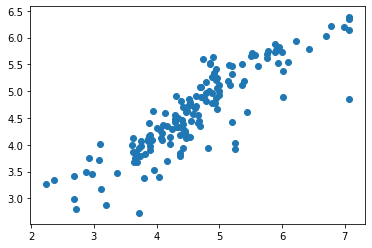

In [73]:
plt.scatter(y_test, y_pred)